# Explore CC measurements

In [1]:
# solve issue with autocomplete
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import os
import sys
import time
from datetime import datetime
import glob
import time

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

import numpy as np
import pandas as pd
import pickle

from obspy import read
from obspy.taup import plot_travel_times,TauPyModel

In [3]:
#  ------------------ read kernel_filter.txt ------------------
def read_kernel_filter(path, event_name):

    dt = np.dtype([('band', 'S10'), ('type', 'S10'), ('dominant_period', float), ('sigma', float)])
    # import ipdb; ipdb.set_trace()
    kernel_filter_dir = os.path.join(path, event_name, 'outfiles', 'kernel_filter.txt')
    band_info = np.loadtxt(kernel_filter_dir, dtype=dt, skiprows=1, usecols=(0, 1, 2, 3))

    return band_info

#  ------------------ read event pkl ------------------
def read_event_pkl(path):

    ev_load = open(os.path.join(path, 'EVENTS-INFO', 'event_list_pickle'), 'rb')
    ev_pkl = pickle.load(ev_load)
    ev_load.close()

    return ev_pkl

In [4]:
catalouge_path = '/mnt/seismodata2/MT/_INPUT_/neic_2018_2020_all'

pyff_output = '/mnt/seismodata/MT/SEA-SEIS_TOMO/ffproc/SEA-SEIS_skewed_15.10.2021b'

path_events = glob.glob(os.path.join(pyff_output, '*.?'))
all_events = []
for i in path_events:
    join = i.split('/')[-1]
    all_events.append(join)
# import ipdb; ipdb.set_trace()
inp_band = read_kernel_filter(pyff_output, all_events[0])

bands_sec = inp_band['dominant_period']
# stations = ['NAMOR', 'LUIGI', 'CHARL', 'LIGEA', 'LOCH', 'WILSN', 'QUAKY', 'MAUDE', 'GRAIN', 'GILL', 'TOM', 'EVE', 'BRIAN']


In [5]:
# all_events, bands_sec, stations , inp_band

In [6]:
# ampstt_dir = os.path.join(pyff_output, event, 'outfiles', 'ffproc.ampstt.band%02d' % 1)

In [24]:
header = ['idx','grp','stla','stlo','stazie','stnam','xc_coeff','Tobs','dT','sigma_dT','not_used1','not_used2','A','not_used3','not_used4','not_used5','tB_smgr','tB_mfi','winlen','clip_taumax','not_used6','SNR','ts_step1','ts_step2','cc_step1','cc_step2','clip_step1','clip_step2']
cc_df = []

for i, value in enumerate(bands_sec):
    band = i + 1
    print(f'Working on Band {band:02d}')
    for j, event in enumerate(all_events):
        
        info_pkl = read_event_pkl(catalouge_path)
        
        try:
            indx = [i for i, ev in enumerate(info_pkl) if ev['event_id'] == event][0]
        except Exception as exp:
            continue
        
        ampstt_dir = os.path.join(pyff_output, event, 'outfiles', 'ffproc.ampstt.band%02d' % band)
        
        try:
            df = pd.read_csv(ampstt_dir, delim_whitespace=True, skiprows=4, names = header)
            df.insert(1, "band", [band]*len(df), True)
            df.insert(2, "event", [event]*len(df), True)
        
        except Exception as exp:
            print(exp, len(df), band)
        
        cc_df.append(df)
        
#         if i == 0:
#             break
    print(f'\tfinished reading Band {band:02d}')
all_df = pd.concat(cc_df)

Working on Band 01
	finished reading Band 01
Working on Band 02
	finished reading Band 02
Working on Band 03
	finished reading Band 03
Working on Band 04
	finished reading Band 04
Working on Band 05
	finished reading Band 05
Working on Band 06
	finished reading Band 06
Working on Band 07
	finished reading Band 07
Working on Band 08
	finished reading Band 08


In [27]:
min(all_df['xc_coeff']), max(all_df['xc_coeff'])

(-0.53, 0.98)

In [28]:
all_df[all_df['xc_coeff'] >= 0.7]

,idx,band,event,grp,stla,stlo,stazie,stnam,xc_coeff,Tobs,...,winlen,clip_taumax,not_used6,SNR,ts_step1,ts_step2,cc_step1,cc_step2,clip_step1,clip_step2
1,2,1,20200325_024921.a,1,59.52,-19.60,71.85,AI.LUIGI.00.HHZ,0.94,673.00,...,45.4,0,0.0,4.313,-37.0,0.0,0.922,0.935,0,0
2,3,1,20200325_024921.a,1,58.80,-14.50,72.41,AI.CHARL.00.HHZ,0.91,676.52,...,45.4,0,0.0,5.520,-34.0,-1.0,0.897,0.909,0,0
3,4,1,20200325_024921.a,1,58.94,-22.13,72.46,AI.LIGEA.00.HHZ,0.91,676.42,...,45.4,0,0.0,5.604,-39.0,0.0,0.890,0.911,0,0
4,5,1,20200325_024921.a,1,56.01,-9.98,74.89,AI.LOCH.00.HHZ,0.88,689.65,...,45.4,0,0.0,6.637,-49.0,0.0,0.861,0.880,0,0
5,6,1,20200325_024921.a,1,56.34,-24.49,75.05,AI.WILSN.00.HHZ,0.93,690.79,...,45.4,0,0.0,8.415,-47.0,0.0,0.910,0.932,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,9,8,20190526_074115.a,1,54.47,-13.21,79.02,AI.GRAIN.00.HHZ,0.79,708.24,...,5.9,0,0.0,2.580,-35.0,13.0,0.837,0.788,0,0
9,10,8,20190526_074115.a,1,51.10,-10.10,79.32,AI.TOM.00.HHZ,0.76,707.66,...,5.9,0,0.0,2.697,-43.0,-1.0,0.841,0.762,0,0
0,1,8,20200128_215516.a,1,56.34,-24.49,55.88,AI.WILSN.00.HHZ,0.70,585.23,...,5.9,0,0.0,0.551,70.0,5.0,0.191,0.699,1,0
1,2,8,20200128_215516.a,1,58.94,-22.13,57.89,AI.LIGEA.00.HHZ,0.83,588.40,...,5.9,0,0.0,1.163,-32.0,-4.0,0.287,0.828,0,0


## Plot travel times of all bands

In [47]:
df_cc = all_df[all_df['xc_coeff'] >= 0.0]
df_cc.sort_values(by=['xc_coeff'])

,idx,band,event,grp,stla,stlo,stazie,stnam,xc_coeff,Tobs,...,winlen,clip_taumax,not_used6,SNR,ts_step1,ts_step2,cc_step1,cc_step2,clip_step1,clip_step2
0,1,1,20191023_160814.a,1,49.85,-12.03,50.78,AI.BRIAN.00.HHZ,-0.00,547.64,...,45.4,0,0.0,1.112,70.0,5.0,0.465,-0.001,1,0
2,3,7,20190315_050350.a,1,49.85,-12.03,82.48,AI.BRIAN.00.HHZ,0.00,711.43,...,7.5,0,0.0,0.582,70.0,13.0,0.038,0.003,1,0
9,10,1,20191225_033601.a,1,51.90,-11.25,65.46,AI.GILL.00.HHZ,0.00,652.66,...,45.4,1,0.0,0.473,70.0,20.0,0.019,0.004,1,1
1,2,1,20191127_072342.a,1,58.80,-14.50,33.77,AI.CHARL.00.HHZ,0.00,395.97,...,45.4,0,0.0,1.092,17.0,-7.0,0.005,0.001,0,0
3,4,1,20191127_072342.a,1,58.94,-22.13,37.49,AI.LIGEA.00.HHZ,0.00,435.85,...,45.4,1,0.0,0.678,70.0,20.0,0.218,0.000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,13,1,20181130_172929.a,1,49.85,-12.03,64.14,AI.BRIAN.00.HHZ,0.97,624.41,...,45.4,0,0.0,3.481,-38.0,-12.0,0.900,0.967,0,0
10,11,1,20181130_172929.a,1,50.90,-12.90,62.95,AI.EVE.00.HHZ,0.97,618.49,...,45.4,0,0.0,3.967,-25.0,-7.0,0.935,0.965,0,0
5,6,5,20190618_132219.a,1,55.42,-11.43,83.07,AI.QUAKY.00.HHZ,0.97,746.85,...,12.9,0,0.0,7.974,6.0,8.0,0.708,0.973,0,0
2,3,5,20190618_132219.a,1,59.52,-19.60,80.67,AI.LUIGI.00.HHZ,0.98,733.77,...,12.9,0,0.0,2.700,3.0,6.0,0.435,0.976,0,0


In [48]:
min(df_cc['xc_coeff']), max(df_cc['xc_coeff'])

(-0.0, 0.98)

<IPython.core.display.Javascript object>


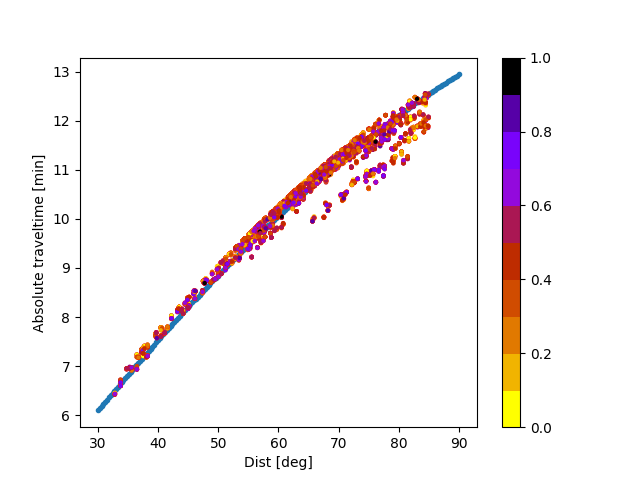

In [49]:
# compute the requested arrivals:
model ='iasp91'
min_degrees = 30
max_degrees = 90
npoints = 200
source_depth = 30
phase_list = ['P']
plot_all=True
if not isinstance(model, TauPyModel):
    model = TauPyModel(model)

fig, ax = plt.subplots()

# a list of epicentral distances without a travel time, and a flag:
notimes = []

# calculate the arrival times and plot vs. epicentral distance:
degrees = np.linspace(min_degrees, max_degrees, npoints)
for degree in degrees:
    try:
        arrivals = model.get_ray_paths(source_depth, degree,
                                       phase_list=phase_list)
        ax = arrivals.plot_times(phase_list=phase_list, show=False,
                                 ax=ax, plot_all=plot_all)
    except Exception as exp:
        print(exp)

# cmap = plt.cm.autumn_r
cmap = plt.cm.gnuplot_r

norm = colors.BoundaryNorm(np.arange(0.0, 1.1, 0.1), cmap.N)

plt.scatter(df_cc['stazie'], df_cc['Tobs']/60, c=abs(df_cc['xc_coeff']), vmin=0.00, vmax=1, 
            cmap=cmap, norm=norm, s=10, edgecolor='red', lw=0.1, zorder=50)

plt.colorbar()
plt.xlabel('Dist [deg]')
plt.ylabel('Absolute traveltime [min]')

plt.show()

In [ ]:
df_cc['clip_taumax']

## Plot bandwise cc historgrams

In [ ]:
cc_factor = 0.0
df_cc = all_df[(all_df['xc_coeff']>=cc_factor) & (all_df['clip_taumax'] == 0)]

plt.figure(figsize=(10,5))

# for the specific band different colors and linewidths
cmap = plt.get_cmap('jet_r')
# import ipdb; ipdb.set_trace()
colors = cmap(np.linspace(0, 1.0, len(bands_sec)))
line_width = range(len(bands_sec) + 1)[::-1][0:-1]
band_freq = bands_sec

bins_bin = len(np.arange(cc_factor, 1.0, 0.03)) - 1
bins_range = [cc_factor, 1.0]

for i, band in enumerate(bands_sec):
    df_band = df_cc[df_cc['band'] == i+1]
    
    y, binEdges = np.histogram(df_band['xc_coeff'].to_numpy(), bins=bins_bin, range=bins_range)
    bin_centers = 0.5 * (binEdges[1:] + binEdges[:-1])

    # import ipdb; ipdb.set_trace()
    plt.plot(bin_centers, y, color=colors[i], lw=line_width[i],
             label='B0%s - %2.2fs: %s data points' % (band, band, len(df_band['xc_coeff'].to_numpy())))

plt.xlabel('cross correlation coefficient', size=15, weight='bold')
plt.ylabel('number of measurements', size=15, weight='bold')
# plt.title('Histogram of Measurements\nCriteria: cc>=%s -- ts <=%s -- clip=%s'
#           % (cc_factor, ts_factor, clip_factor), size=40, weight='bold')
plt.legend(fontsize=5, loc=3)

plt.grid(True)
plt.show()

In [ ]:
df_band['xc_coeff'].to_numpy

In [ ]:
my_xticks = stations

for i, value in enumerate(bands_sec):
    band = i + 1
    df_combine = []
    for j, event in enumerate(all_events):
        df1_select = all_df1[(all_df1['xc_coeff'] > 0.7)&(all_df1['event']==event)&(all_df1['band']==band)]
        df2_select = all_df2[(all_df1['xc_coeff'] > 0.7)&(all_df2['event']==event)&(all_df2['band']==band)]
        
        df1_select.sort_values('stnam')
        df2_select.sort_values('stnam')
        

        plt.figure()

        ax = df1_select[['stnam', 'dT']].plot.scatter(x='stnam', y='dT', s=100, c='blue',  figsize=(10,5), title=f'Band {band} | {event}')
        df2_select[['stnam','dT']].plot.scatter(x='stnam', y='dT', c='orange', grid=True, s=100, ax=ax)
        plt.xticks(rotation=90)
        
        plt.show()
        
        
